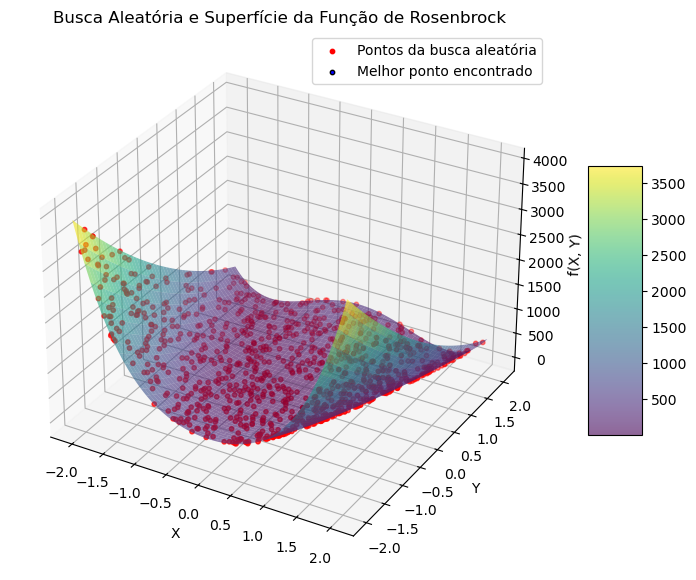

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def funcao_rosenbrock(x, y, a=1, b=100):
    """
    Função de Rosenbrock para dois parâmetros.
    
    Parâmetros:
    x, y (float): Variáveis de entrada.
    a, b (float): Parâmetros da função de Rosenbrock.
    
    Retorna:
    float: Valor da função Rosenbrock para o par (x, y).
    """
    return (a - x)**2 + b * (y - x**2)**2

def busca_aleatoria(quantidade_iteracoes, limite_inferior, limite_superior):
    pontos_x = []
    pontos_y = []
    pontos_valor = []

    melhor_x = None
    melhor_y = None
    melhor_valor = np.inf

    for _ in range(quantidade_iteracoes):
        x = random.uniform(limite_inferior, limite_superior)
        y = random.uniform(limite_inferior, limite_superior)
        valor = funcao_rosenbrock(x, y)

        # Armazena cada ponto amostrado na busca aleatória
        pontos_x.append(x)
        pontos_y.append(y)
        pontos_valor.append(valor)

        # Atualiza o melhor valor e suas coordenadas
        if valor < melhor_valor:
            melhor_valor = valor
            melhor_x = x
            melhor_y = y

    return melhor_x, melhor_y, melhor_valor, pontos_x, pontos_y, pontos_valor

# Parâmetros da busca aleatória e intervalo de amostragem
quantidade_iteracoes = 1000
limite_inferior = -2.048
limite_superior = 2.048

# Executa a busca aleatória e obtém os pontos
melhor_x, melhor_y, melhor_valor, pontos_x, pontos_y, pontos_valor = busca_aleatoria(
    quantidade_iteracoes, limite_inferior, limite_superior
)

# Criação de uma malha para a superfície da função de Rosenbrock
x = np.linspace(limite_inferior, limite_superior, 100)
y = np.linspace(limite_inferior, limite_superior, 100)
x, y = np.meshgrid(x, y)
z = funcao_rosenbrock(x, y)

# Criação do gráfico 3D com a superfície e os pontos da busca aleatória
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plota a superfície da função de Rosenbrock
surf = ax.plot_surface(x, y, z, cmap='viridis', alpha=0.6, edgecolor='none')

# Plota todos os pontos aleatórios encontrados na busca aleatória
ax.scatter(pontos_x, pontos_y, pontos_valor, color='red', s=10, label='Pontos da busca aleatória')

# Plota o melhor ponto encontrado em destaque
ax.scatter(melhor_x, melhor_y, melhor_valor, color='blue', s=10, label='Melhor ponto encontrado', edgecolors='black')

# Configurações de rótulos, título e barra de cores
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("f(X, Y)")
ax.set_title("Busca Aleatória e Superfície da Função de Rosenbrock")
ax.legend()
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

# Exibe o gráfico
plt.show()
